# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

browser.visit(url)

html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [110]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [111]:
# Extract all rows of data
# Find the table
table = soup.find('table', class_='table')

data_rows = table.find_all('tr',class_='data-row')


In [112]:
#data_rows

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [113]:
# Create an empty list
mars_temperature = []

# Loop through the scraped data to create a list of rows
for row in data_rows:
    columns = row.find_all('td')
    id = columns[0].text.strip() # the identification number of a single transmission from the Curiosity rover
    terrestrial_date = columns[1].text.strip() # the date on Earth
    sol = columns[2].text.strip() # the number of elapsed sols (Martian days) since Curiosity landed on Mars
    ls = columns[3].text.strip() # the solar longitude
    month = columns[4].text.strip() # the Martian month
    min_temp = columns[5].text.strip() # the minimum temperature, in Celsius, of a single Martian day (sol)
    pressure = columns[6].text.strip() # The atmospheric pressure at Curiosity's location
    
     # Store each data row parameters in a dictionary
    mars_temperature.append({
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure,
    })
    
# mars_temperature

In [114]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_temperature_df = pd.DataFrame(mars_temperature, columns=columns)

In [115]:
# Confirm DataFrame was created successfully
from tabulate import tabulate

print(tabulate(mars_temperature_df.head(), headers='keys', tablefmt='psql'))


+----+------+--------------------+-------+------+---------+------------+------------+
|    |   id | terrestrial_date   |   sol |   ls |   month |   min_temp |   pressure |
|----+------+--------------------+-------+------+---------+------------+------------|
|  0 |    2 | 2012-08-16         |    10 |  155 |       6 |        -75 |        739 |
|  1 |   13 | 2012-08-17         |    11 |  156 |       6 |        -76 |        740 |
|  2 |   24 | 2012-08-18         |    12 |  156 |       6 |        -76 |        741 |
|  3 |   35 | 2012-08-19         |    13 |  157 |       6 |        -74 |        732 |
|  4 |   46 | 2012-08-20         |    14 |  157 |       6 |        -74 |        740 |
+----+------+--------------------+-------+------+---------+------------+------------+


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [116]:
# Examine data type of each column

# Print the data types of each column in the DataFrame
print(mars_temperature_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [117]:
# Change data types for data analysis
mars_temperature_df['sol'] = mars_temperature_df['sol'].astype(int)
mars_temperature_df['ls'] = mars_temperature_df['ls'].astype(int)
mars_temperature_df['month'] = mars_temperature_df['month'].astype(int)
mars_temperature_df['min_temp'] = mars_temperature_df['min_temp'].astype(float)
mars_temperature_df['pressure'] = mars_temperature_df['pressure'].astype(float)
mars_temperature_df['terrestrial_date'] = pd.to_datetime(mars_temperature_df['terrestrial_date'])

In [118]:
# Confirm type changes were successful by examining data types again
print(mars_temperature_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [119]:
# 1. How many months are there on Mars?

month_counts = mars_temperature_df['month'].value_counts().sort_index()

# Convert the Series to DataFrame for a better presentation
# month_counts_df = month_counts.reset_index()
# month_counts_df.columns = ['Month', 'Count']

# Print the DataFrame
print (month_counts)
#print(month_counts_df.to_string(index=False, header=False))

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [120]:
# 2. How many Martian days' worth of data are there?
unique_days = mars_temperature_df['sol'].nunique()
print(unique_days)

1867


In [121]:
# 3. What is the average low temperature by month?

# Group the data by 'month' and calculate the average 'min_temp' for each month
average_temps_by_month = mars_temperature_df.groupby('month')['min_temp'].mean()

# Convert the Series to a DataFrame for better readability and reset the index
average_temps_df = average_temps_by_month.reset_index()
average_temps_df.columns = ['Month', '']

# Print the DataFrame
print(average_temps_df.to_string(index=False))

 Month           
     1 -77.160920
     2 -79.932584
     3 -83.307292
     4 -82.747423
     5 -79.308725
     6 -75.299320
     7 -72.281690
     8 -68.382979
     9 -69.171642
    10 -71.982143
    11 -71.985507
    12 -74.451807


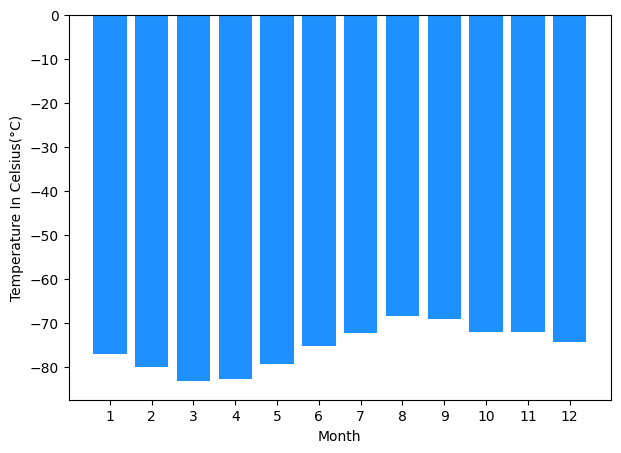

In [122]:
# Plot the average temperature by month

# Plotting
plt.figure(figsize=(7, 5))
plt.bar(average_temps_by_month.index, average_temps_by_month.values, color='dodgerblue')
plt.xlabel('Month')
plt.ylabel('Temperature In Celsius(°C)')
plt.title('')
plt.xticks(average_temps_by_month.index)  # Ensure all month labels are shown
plt.grid(False)
plt.show()

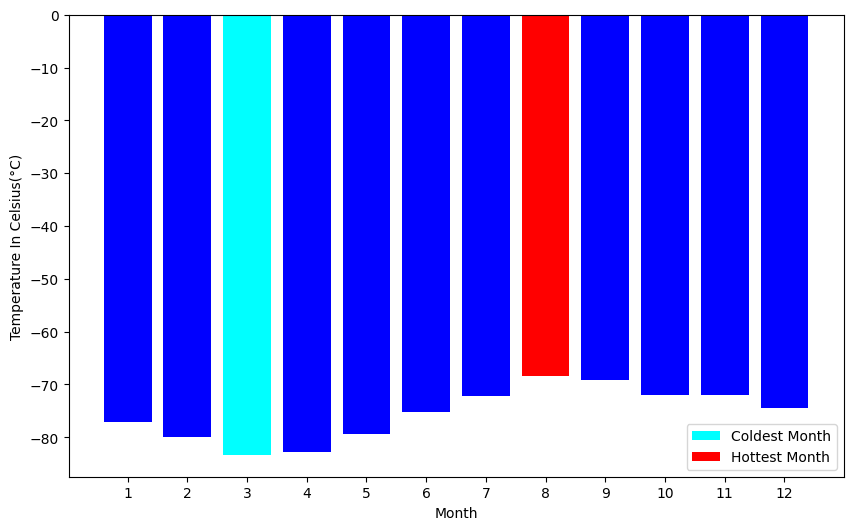

In [123]:
# Identify the coldest and hottest months in Curiosity's location

# Find the coldest and hottest months
coldest_month = average_temps_by_month.idxmin()
hottest_month = average_temps_by_month.idxmax()

# Plotting
plt.figure(figsize=(10, 6))
# Plot all months' temperatures
plt.bar(average_temps_by_month.index, average_temps_by_month.values, color='blue')
# Highlight the coldest and hottest months
plt.bar(coldest_month, average_temps_by_month.loc[coldest_month], color='cyan', label='Coldest Month')
plt.bar(hottest_month, average_temps_by_month.loc[hottest_month], color='red', label='Hottest Month')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Temperature In Celsius(°C)')
plt.title('')
plt.xticks(average_temps_by_month.index)  # Ensure all month labels are shown
plt.legend()
plt.grid(False)
plt.show()


In [124]:
# 4. Average pressure by Martian month

# Group the data by 'month' and calculate the average 'pressure' for each month
average_pressure_by_month = mars_temperature_df.groupby('month')['pressure'].mean()

# Convert the Series to a DataFrame for better readability and reset the index
average_pressure_df = average_pressure_by_month.reset_index()
average_pressure_df.columns = ['Month', 'Average Pressure']

# Print the DataFrame
print(average_pressure_df)

    Month  Average Pressure
0       1        862.488506
1       2        889.455056
2       3        877.322917
3       4        806.329897
4       5        748.557047
5       6        745.054422
6       7        795.105634
7       8        873.829787
8       9        913.305970
9      10        887.312500
10     11        857.014493
11     12        842.156627


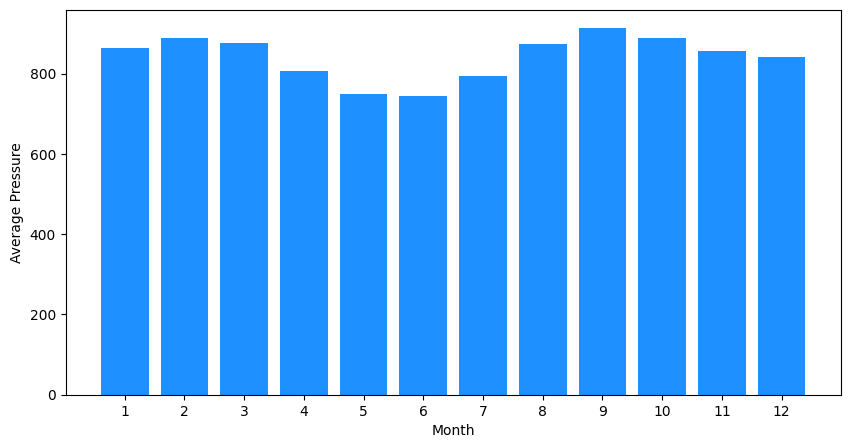

In [125]:
# Plot the average pressure by month

plt.figure(figsize=(10, 5))
plt.bar(average_pressure_df['Month'], average_pressure_df['Average Pressure'], color='dodgerblue')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('')
plt.xticks(average_pressure_df['Month'])  # Ensure all month labels are shown
plt.grid(False)
plt.show()

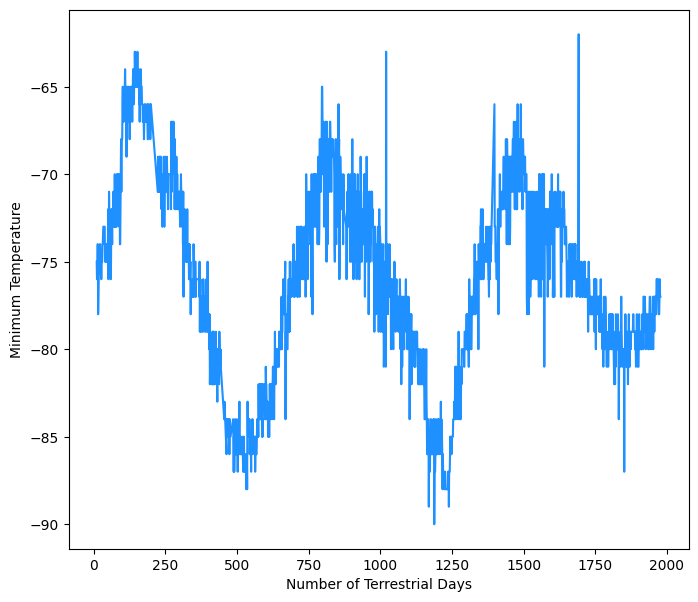

In [127]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_temperature_df.sort_values('sol', inplace=True)
# Plotting
plt.figure(figsize=(8, 7))
plt.plot(mars_temperature_df['sol'], mars_temperature_df['min_temp'], color='dodgerblue', linewidth=1.5)  # Line plot

# Adding labels and title
plt.title('')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.grid(False)  # Add a grid for better readability of the plot
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [128]:
# Write the data to a CSV
# Save DataFrame to a CSV file
mars_temperature_df.to_csv('mars_data.csv', index=False)  # Set index=False if you do not want the index column in your CSV

In [129]:
browser.quit()